In [1]:


import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)






In [2]:


def load():
    data = pd.read_csv("../../datasets/Telco-Customer-Churn.csv")
    return data


df = load()
df.head()





,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [3]:
df.shape


(7043, 21)

In [6]:
df.columns = [col.upper() for col in df.columns]


In [7]:
# Yeni özelliği oluştur
df['AGE_DEPENDENTS'] = df.apply(
    lambda x: 'Yaşlı ve Yükümlü' if x['SENIORCITIZEN'] == 1 and x['DEPENDENTS'] == 'Yes' else
              'Yaşlı ve Yükümsüz' if x['SENIORCITIZEN'] == 1 and x['DEPENDENTS'] == 'No' else
              'Genç ve Yükümlü' if x['SENIORCITIZEN'] == 0 and x['DEPENDENTS'] == 'Yes' else
              'Genç ve Yükümsüz',
    axis=1
)

# Sonuçları görüntüle
df.head()


,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,AGE_DEPENDENTS
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No,Genç ve Yükümsüz
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No,Genç ve Yükümsüz
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes,Genç ve Yükümsüz
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No,Genç ve Yükümsüz
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes,Genç ve Yükümsüz


In [8]:
df['TECHSUPPORT_USAGE'] = df[['TECHSUPPORT', 'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION']].apply(lambda x: 'YES' if 'Yes' in x.values else 'NO', axis=1)


In [9]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,AGE_DEPENDENTS,TECHSUPPORT_USAGE
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No,Genç ve Yükümsüz,YES
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No,Genç ve Yükümsüz,YES
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes,Genç ve Yükümsüz,YES
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No,Genç ve Yükümsüz,YES
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes,Genç ve Yükümsüz,NO


In [10]:
# Benzersiz değerleri öğrenme
unique_categories = df['TOTALCHARGES'].unique()

print(unique_categories)

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [12]:
print(df['TOTALCHARGES'].dtype)
df['TOTALCHARGES'] = pd.to_numeric(df['TOTALCHARGES'], errors='coerce')


object


In [13]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,AGE_DEPENDENTS,TECHSUPPORT_USAGE
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No,Genç ve Yükümsüz,YES
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No,Genç ve Yükümsüz,YES
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes,Genç ve Yükümsüz,YES
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No,Genç ve Yükümsüz,YES
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes,Genç ve Yükümsüz,NO


In [14]:

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)



Observations: 7043
Variables: 23
cat_cols: 19
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [15]:
def outlier_thresholds(dataframe,col_name,q1 = 0.25 , q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 +1.5 * interquantile_range
    low_limit = quartile1 -1.5 *interquantile_range
    return low_limit , up_limit
    
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)  # Değişken adı düzeltildi
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):  # Parantezler ve operatör düzeltildi
        return True
    else:
        return False

In [16]:
for col in num_cols:
    print(col,check_outlier(df,col))

TENURE False
MONTHLYCHARGES False
TOTALCHARGES False


In [17]:
def missing_values_table ( datafreame , na_name=False):
    na_columns = [col for col in datafreame.columns if datafreame[col].isnull().sum()>0]
    n_miss = (datafreame[na_columns].isnull().sum()).sort_values(ascending = False)
    ratio = (datafreame[na_columns].isnull().sum() / datafreame.shape[0] * 100 ).sort_values(ascending =False)
    missing_df = pd.concat([n_miss , np.round(ratio,2)] , axis =1 , keys = ['n_miss' , 'ratio'])
    print(missing_df,end="\n")
    if na_columns:
        return na_columns

In [18]:
missing_values_table(df)

              n_miss  ratio
TOTALCHARGES      11  0.160


['TOTALCHARGES']

In [19]:
binary_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() == 2]
binary_cols

['GENDER',
 'PARTNER',
 'DEPENDENTS',
 'PHONESERVICE',
 'PAPERLESSBILLING',
 'CHURN',
 'TECHSUPPORT_USAGE']

In [20]:
def label_encoder(dataframe , binary_col_name):
    label_encoder = LabelEncoder()
    dataframe[binary_col_name] = label_encoder.fit_transform(dataframe[binary_col_name])
    return dataframe
    

In [21]:
for col in binary_cols:
    df = label_encoder(df,col)

In [22]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,AGE_DEPENDENTS,TECHSUPPORT_USAGE
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,Genç ve Yükümsüz,1
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,Genç ve Yükümsüz,1
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,Genç ve Yükümsüz,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,Genç ve Yükümsüz,1
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,Genç ve Yükümsüz,0


In [23]:
cat_cols

['GENDER',
 'PARTNER',
 'DEPENDENTS',
 'PHONESERVICE',
 'MULTIPLELINES',
 'INTERNETSERVICE',
 'ONLINESECURITY',
 'ONLINEBACKUP',
 'DEVICEPROTECTION',
 'TECHSUPPORT',
 'STREAMINGTV',
 'STREAMINGMOVIES',
 'CONTRACT',
 'PAPERLESSBILLING',
 'PAYMENTMETHOD',
 'CHURN',
 'AGE_DEPENDENTS',
 'TECHSUPPORT_USAGE',
 'SENIORCITIZEN']

In [24]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,AGE_DEPENDENTS,TECHSUPPORT_USAGE
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,Genç ve Yükümsüz,1
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,Genç ve Yükümsüz,1
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,Genç ve Yükümsüz,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,Genç ve Yükümsüz,1
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,Genç ve Yükümsüz,0


In [25]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique()>2]
ohe_cols

['MULTIPLELINES',
 'INTERNETSERVICE',
 'ONLINESECURITY',
 'ONLINEBACKUP',
 'DEVICEPROTECTION',
 'TECHSUPPORT',
 'STREAMINGTV',
 'STREAMINGMOVIES',
 'CONTRACT',
 'PAYMENTMETHOD',
 'AGE_DEPENDENTS']

In [26]:
def one_hot_encoder(dataframe, categorical_cols , drop_first=True):
    dataframe = pd.get_dummies(dataframe , columns=categorical_cols , drop_first=drop_first)
    return dataframe

In [27]:
df=one_hot_encoder(df,ohe_cols)

In [28]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,CHURN,TECHSUPPORT_USAGE,MULTIPLELINES_No phone service,MULTIPLELINES_Yes,INTERNETSERVICE_Fiber optic,INTERNETSERVICE_No,ONLINESECURITY_No internet service,ONLINESECURITY_Yes,ONLINEBACKUP_No internet service,ONLINEBACKUP_Yes,DEVICEPROTECTION_No internet service,DEVICEPROTECTION_Yes,TECHSUPPORT_No internet service,TECHSUPPORT_Yes,STREAMINGTV_No internet service,STREAMINGTV_Yes,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check,AGE_DEPENDENTS_Genç ve Yükümsüz,AGE_DEPENDENTS_Yaşlı ve Yükümlü,AGE_DEPENDENTS_Yaşlı ve Yükümsüz
0,7590-VHVEG,0,0,1,0,1,0,1,29.850,29.850,0,1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.950,1889.500,0,1,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.850,108.150,1,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.300,1840.750,0,1,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.700,151.650,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [29]:
df.shape


(7043, 36)

In [30]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 7043
Variables: 36
cat_cols: 32
num_cols: 3
cat_but_car: 1
num_but_cat: 32


In [31]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and 
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]

In [32]:
useless_cols

[]

In [33]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()

,TENURE,MONTHLYCHARGES,TOTALCHARGES
0,-1.277,-1.160,-0.994
1,0.066,-0.260,-0.174
2,-1.237,-0.363,-0.960
3,0.514,-0.747,-0.195
4,-1.237,0.197,-0.940


In [34]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,CHURN,TECHSUPPORT_USAGE,MULTIPLELINES_No phone service,MULTIPLELINES_Yes,INTERNETSERVICE_Fiber optic,INTERNETSERVICE_No,ONLINESECURITY_No internet service,ONLINESECURITY_Yes,ONLINEBACKUP_No internet service,ONLINEBACKUP_Yes,DEVICEPROTECTION_No internet service,DEVICEPROTECTION_Yes,TECHSUPPORT_No internet service,TECHSUPPORT_Yes,STREAMINGTV_No internet service,STREAMINGTV_Yes,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check,AGE_DEPENDENTS_Genç ve Yükümsüz,AGE_DEPENDENTS_Yaşlı ve Yükümlü,AGE_DEPENDENTS_Yaşlı ve Yükümsüz
0,7590-VHVEG,0,0,1,0,-1.277,0,1,-1.160,-0.994,0,1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,1,0,0,0,0.066,1,0,-0.260,-0.174,0,1,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False
2,3668-QPYBK,1,0,0,0,-1.237,1,1,-0.363,-0.960,1,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,7795-CFOCW,1,0,0,0,0.514,0,0,-0.747,-0.195,0,1,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False
4,9237-HQITU,0,0,0,0,-1.237,1,1,0.197,-0.940,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [35]:
y = df["CHURN"]

X = df.drop(["CUSTOMERID","CHURN"],axis=1)

df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,CHURN,TECHSUPPORT_USAGE,MULTIPLELINES_No phone service,MULTIPLELINES_Yes,INTERNETSERVICE_Fiber optic,INTERNETSERVICE_No,ONLINESECURITY_No internet service,ONLINESECURITY_Yes,ONLINEBACKUP_No internet service,ONLINEBACKUP_Yes,DEVICEPROTECTION_No internet service,DEVICEPROTECTION_Yes,TECHSUPPORT_No internet service,TECHSUPPORT_Yes,STREAMINGTV_No internet service,STREAMINGTV_Yes,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check,AGE_DEPENDENTS_Genç ve Yükümsüz,AGE_DEPENDENTS_Yaşlı ve Yükümlü,AGE_DEPENDENTS_Yaşlı ve Yükümsüz
0,7590-VHVEG,0,0,1,0,-1.277,0,1,-1.160,-0.994,0,1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,1,0,0,0,0.066,1,0,-0.260,-0.174,0,1,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False
2,3668-QPYBK,1,0,0,0,-1.237,1,1,-0.363,-0.960,1,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,7795-CFOCW,1,0,0,0,0.514,0,0,-0.747,-0.195,0,1,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False
4,9237-HQITU,0,0,0,0,-1.237,1,1,0.197,-0.940,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [36]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30 ,random_state=17)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=46).fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

accuracy_score(y_pred,y_test)

0.7879791765262659

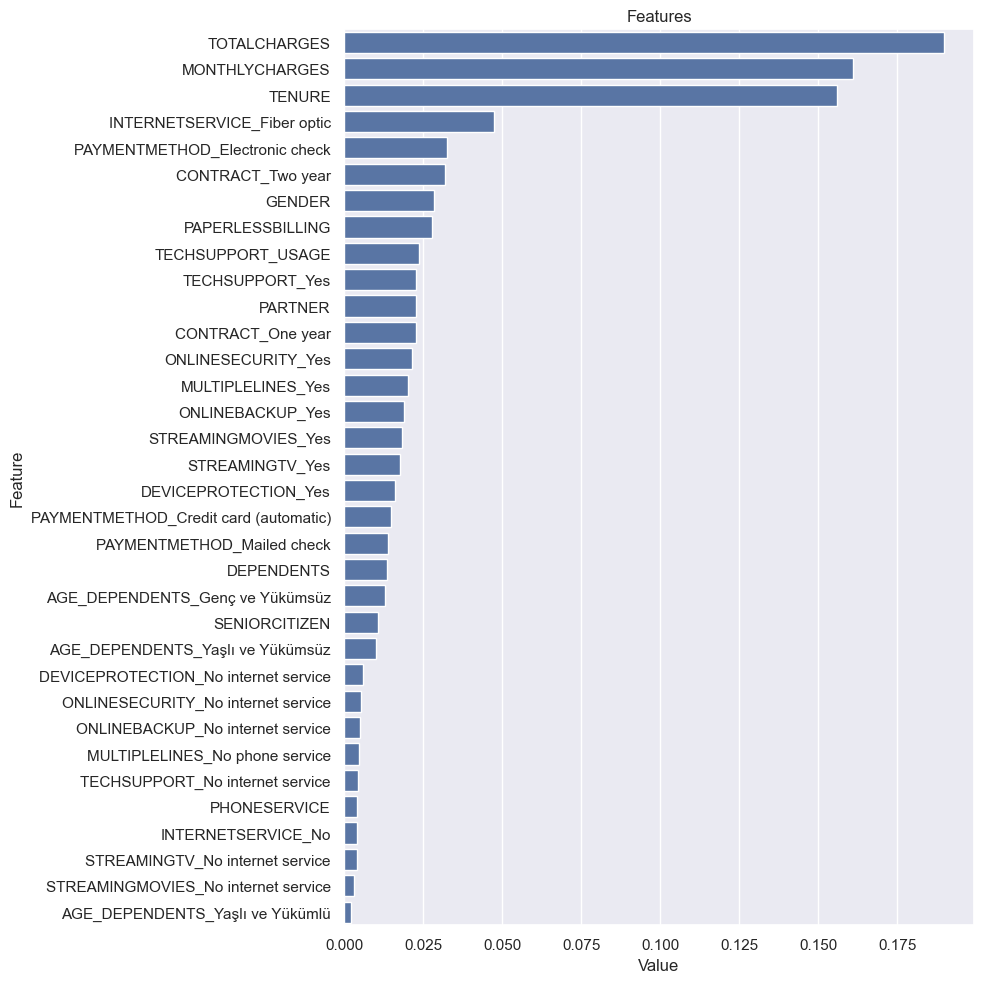

In [39]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X_train)

In [ ]:
df.head()

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Veri setinizi X ve y olarak ayırın
# Örneğin:
# X = df.drop('target_column', axis=1)
# y = df['target_column']

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# Random Forest için hiper parametre grid'i oluşturma
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV ile hiper parametre optimizasyonu
rf_model = RandomForestClassifier(random_state=46)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# En iyi hiper parametreleri ve en iyi doğruluk skorunu yazdırma
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# En iyi modeli kullanarak tahmin yapma
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Test setindeki doğruluk skorunu hesaplama
accuracy = accuracy_score(y_pred, y_test)
print("Test Accuracy:", accuracy)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
475 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    val

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.8048675622057054
Test Accuracy: 0.7889256980596309
